#Perfoming Analysis on Cleaned Frailty Dataset

**Imporing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Cleaned Frality Dataset**

In [3]:
Cleaned_Frailty = pd.read_csv('/content/Frailty_Cleaned_Dataset.csv')
Cleaned_Frailty

,Height (Inches),Weight (Pounds),Age,Grip strength,Frailty
0,67.9,112,17,19,1
1,71.5,136,19,31,1
2,68.2,142,22,28,0
3,70.1,136,23,20,0
4,67.8,144,29,24,0
5,65.8,112,30,30,1
6,66.8,120,39,31,1
7,69.4,153,45,29,1
8,68.7,123,50,26,1
9,69.8,141,51,22,0


**Visualizing a pie chart that depicts the Frail and Non-Frail status.**

In [7]:
import plotly.express as px

# Getting the Frailty Count
frailty_counts = Cleaned_Frailty['Frailty'].value_counts()
labels = ['Non-Frail', 'Frail']

# Creating a DataFrame for Plotly
frailty_df = pd.DataFrame({
    'Frailty Status': labels,
    'Count': frailty_counts.values
})

fig = px.pie(
    frailty_df,
    values='Count',
    names='Frailty Status',
    title='Distribution of Frailty',
    color='Frailty Status',
    color_discrete_sequence=['#4B9CD3', '#F36F6F'],  # Soft blue and soft red
    template='plotly_white'
)

# Updating the layout
fig.update_layout(
    title={
        'text': "Distribution of Frailty",
        'font': {'size': 24, 'weight': 'bold'},
        'x': 0.5,  # Center the title
        'xanchor': 'center'  # Anchor the title in the center
    }
)
# Showing the chart
fig.show()


**Grip Streng Vs Age Line Plot**

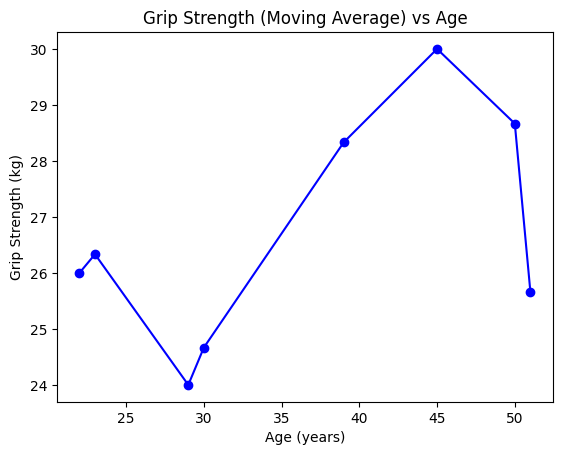

In [11]:
Cleaned_Frailty['Moving Average'] = Cleaned_Frailty['Grip strength'].rolling(window=3).mean()
plt.plot(Cleaned_Frailty['Age'], Cleaned_Frailty['Moving Average'], marker='o', linestyle='-', color='b')
plt.title('Grip Strength (Moving Average) vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Grip Strength (kg)')
plt.show()

**Box Plot of Grip Strength By Frailty**

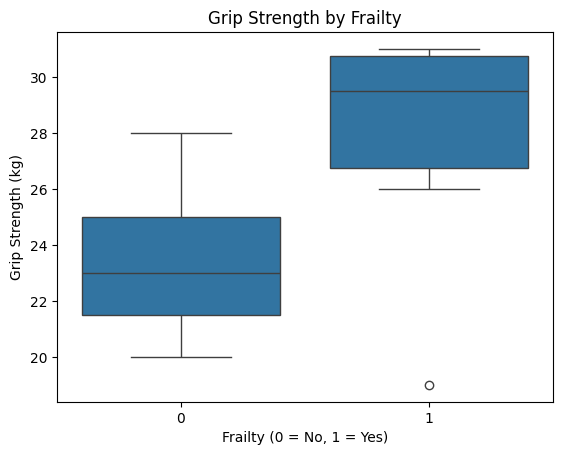

In [17]:
sns.boxplot(x='Frailty', y='Grip strength', data=Cleaned_Frailty)
plt.title('Grip Strength by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength (kg)')
plt.show()

**Calculating Correlation Matrix**

In [21]:
numeric_df = Cleaned_Frailty.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  Height (Inches)  Weight (Pounds)        Age  Grip strength  \
Height (Inches)          1.000000          0.571525 -0.032580      -0.167682   
Weight (Pounds)          0.571525          1.000000  0.190926       0.032807   
Age                     -0.032580          0.190926  1.000000       0.133756   
Grip strength           -0.167682          0.032807  0.133756       1.000000   
Frailty                 -0.193186         -0.535200  0.083655       0.475867   
Moving Average           0.286577          0.109032  0.538744       0.350164   

                   Frailty  Moving Average  
Height (Inches)  -0.193186        0.286577  
Weight (Pounds)  -0.535200        0.109032  
Age               0.083655        0.538744  
Grip strength     0.475867        0.350164  
Frailty           1.000000        0.618423  
Moving Average    0.618423        1.000000  


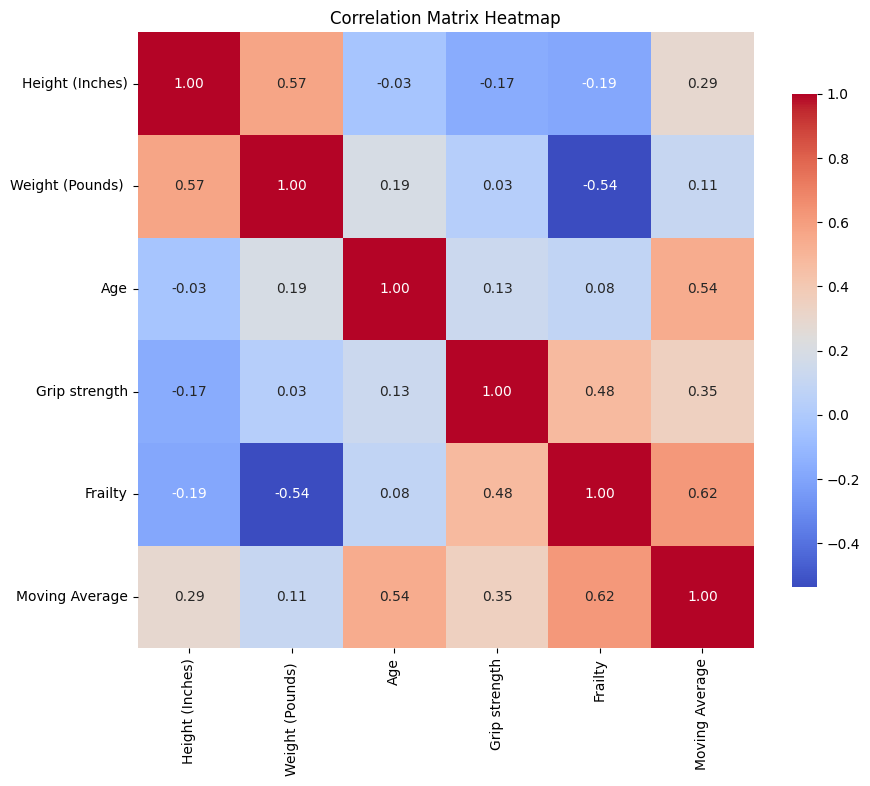

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()
